In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
print(df)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df.drop(columns = ['RowNumber','CustomerId','Surname','Geography'],inplace=True)
df.drop(columns = ['NumOfProducts','Gender'],inplace=True)

**Summarize dataset**

In [7]:
print(df.shape)
print(df.head(20))


(10000, 8)
    CreditScore  Age  Tenure    Balance  HasCrCard  IsActiveMember  \
0           619   42       2       0.00          1               1   
1           608   41       1   83807.86          0               1   
2           502   42       8  159660.80          1               0   
3           699   39       1       0.00          0               0   
4           850   43       2  125510.82          1               1   
5           645   44       8  113755.78          1               0   
6           822   50       7       0.00          1               1   
7           376   29       4  115046.74          1               0   
8           501   44       4  142051.07          0               1   
9           684   27       2  134603.88          1               1   
10          528   31       6  102016.72          0               0   
11          497   24       3       0.00          1               0   
12          476   34      10       0.00          1               0   
13       

**Segregate Dataset into X(Input) & Y(Output)**

In [8]:
X = df.iloc[:,:-1].values
X


array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 4.1000000e+01, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 4.2000000e+01, 8.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 3.6000000e+01, 7.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 4.2000000e+01, 3.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 2.8000000e+01, 4.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [9]:
Y = df.iloc[:,-1].values
Y


array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

**Splitting dataset into Train & Test**

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 80)

**Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.09485513, -0.184283  ,  0.67615834, ...,  0.6504256 ,
        -1.02546704, -0.43705626],
       [ 1.72301822, -0.28018524, -0.35606942, ...,  0.6504256 ,
         0.97516542, -1.60172158],
       [ 1.11706043, -0.08838076, -1.38829719, ..., -1.53745485,
        -1.02546704, -0.15436713],
       ...,
       [-1.27595929,  0.39113043, -0.70014534, ...,  0.6504256 ,
        -1.02546704, -1.19158969],
       [-2.06678555, -0.75969644, -1.38829719, ..., -1.53745485,
        -1.02546704, -0.3062615 ],
       [-0.05377325,  0.19932595,  0.67615834, ..., -1.53745485,
         0.97516542, -1.24422703]])

**Training the Model**

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

**Predicting, Whether the New Customer with Age & Salary will Buy the Product or Not**

In [13]:
CreditScore= int(input("Enter the New Customer's CreditScore : "))
Age= int(input("Enter the New Customer's Age : "))
Tenure= int(input("Enter the New Customer's Tenure : "))
Balance= int(input("Enter the New Customer's Balance : "))
#NumOfProducts= int(input("Enter the New Customer's NumOfProducts : "))
HasCrCard= int(input("Enter the New Customer's HasCrCard : "))
IsActiveMember= int(input("Enter the New Customer's IsActiveMember : "))
EstimatedSalary= int(input("Enter the New EstimatedSalary  : "))
#Gender_Male= int(input("Enter the New Customer's Gender : "))



newCust = [[CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary]]
result = model.predict(sc.transform(newCust))
print(result)
if result == 0:
  print("Customer will Buy the Product")
else:
  print("Customer Will Not Buy the Product")

Enter the New Customer's CreditScore : 600
Enter the New Customer's Age : 32
Enter the New Customer's Tenure : 3
Enter the New Customer's Balance : 40000
Enter the New Customer's HasCrCard : 1
Enter the New Customer's IsActiveMember : 1
Enter the New EstimatedSalary  : 120000
[0]
Customer will Buy the Product


**Prediction for all Test Data**

In [14]:
Y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of the Model: {0}%".format(accuracy * 100))

Accuracy of the Model: 80.2%


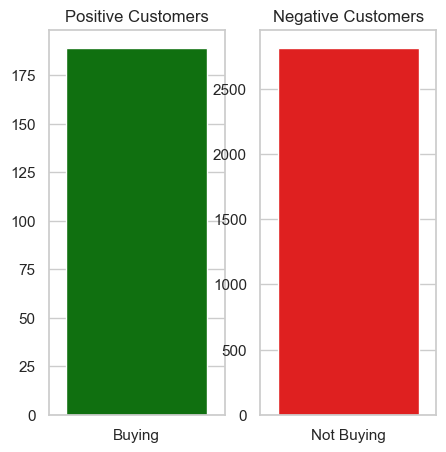

In [16]:
# Count the number of customers predicted as "Buying" and "Not Buying"
buying_count = len(Y_pred[Y_pred == 1])
not_buying_count = len(Y_pred[Y_pred == 0])

# Plotting two bar graphs with different colors
sns.set(style="whitegrid")
plt.figure(figsize=(5,5))

# Bar graph for "Buying" (color: green)
plt.subplot(1, 2, 1)
sns.barplot(x=['Buying'], y=[buying_count], palette=["green"])
plt.title("Positive Customers")

# Bar graph for "Not Buying" (color: red)
plt.subplot(1, 2, 2)
sns.barplot(x=['Not Buying'], y=[not_buying_count], palette=["red"])
plt.title("Negative Customers")

plt.show()
